TODO:

clean up te notebook
classify location related features into one
juxtapose correlation results with feature importance results
fit that into hypothesis that the location is what matters most when it comes to pricing
put all up nicely into a report
add some dumbass references + reference the dataset!

In [94]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [95]:
df = pd.read_csv('airbnb.csv')

In [96]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [97]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [98]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [99]:
df.shape

(48895, 16)

In [100]:
numeric_features = df.select_dtypes(include=[np.number])

numeric_features.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [101]:
categorical_features = df.select_dtypes(exclude=[np.number])
categorical_features.columns

Index(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'],
      dtype='object')

<Axes: >

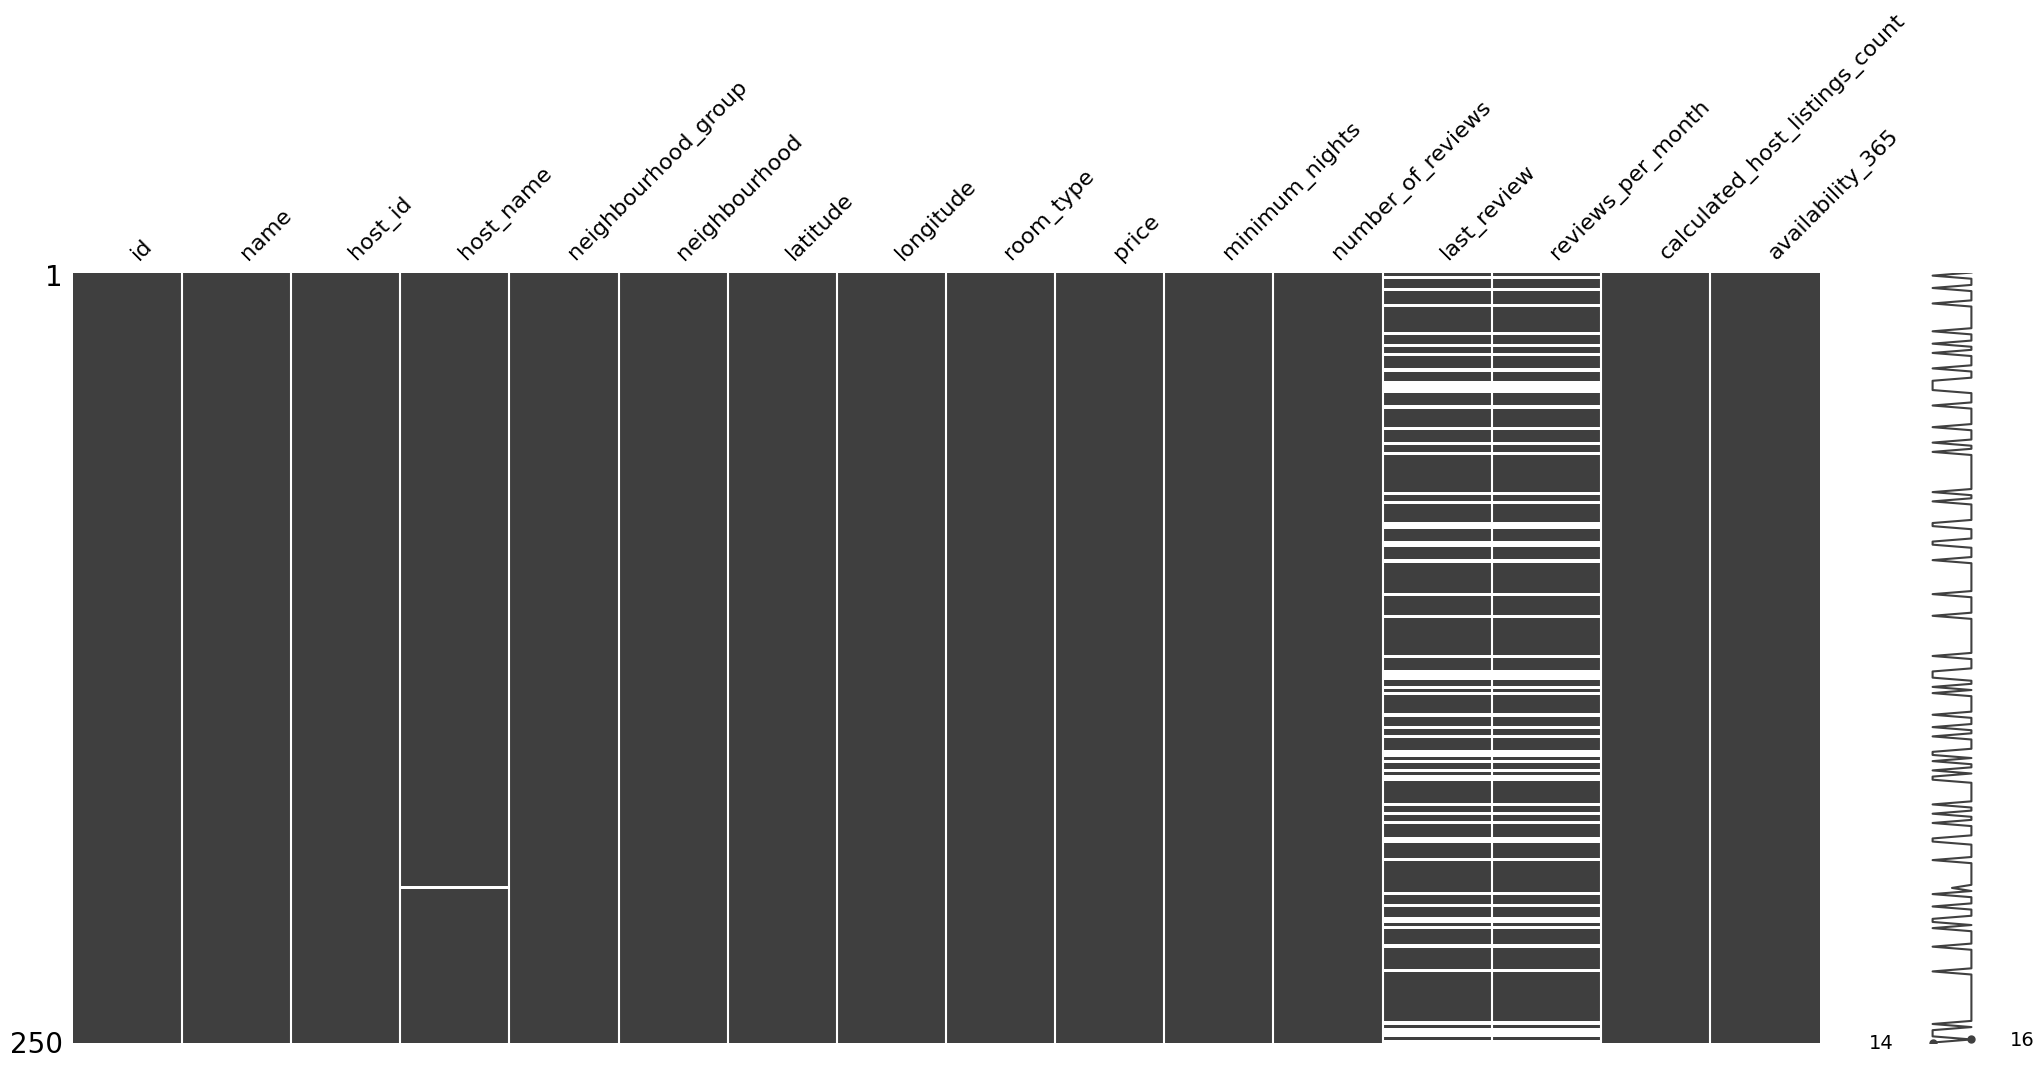

In [102]:
msno.matrix(df.sample(250))

<Axes: >

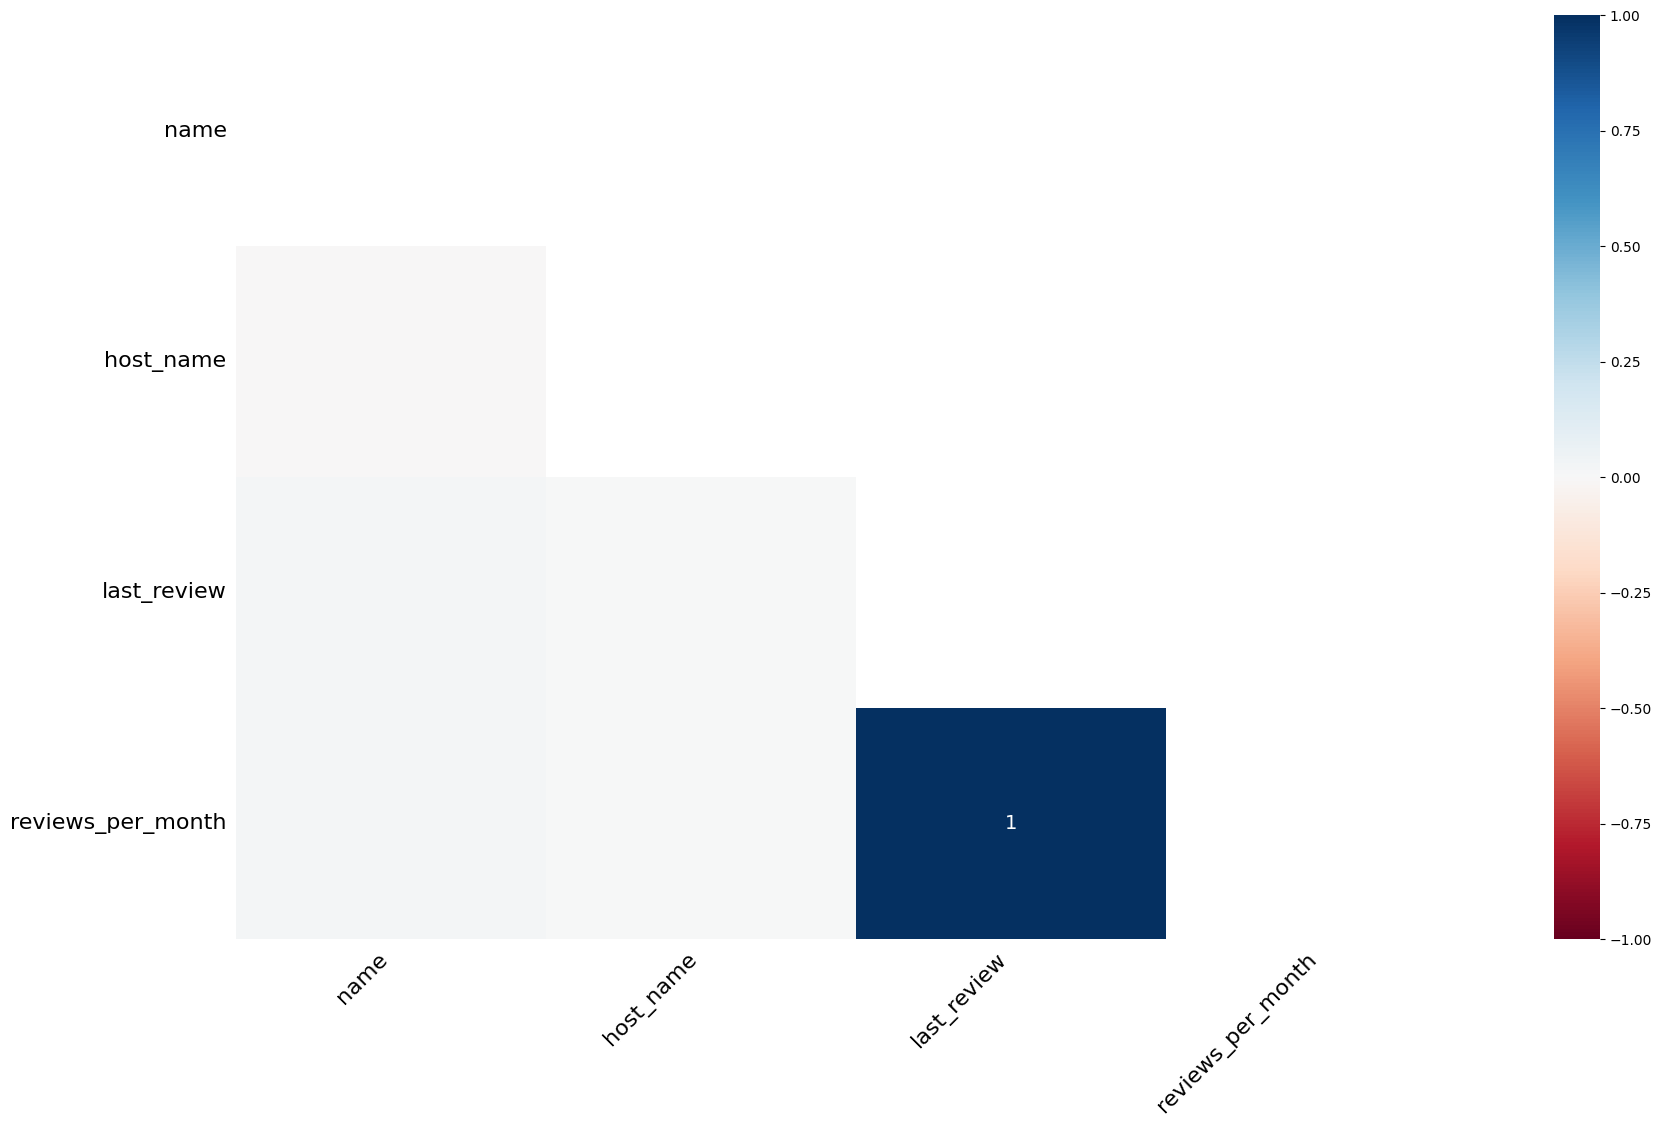

In [103]:
msno.heatmap(df)

<Axes: >

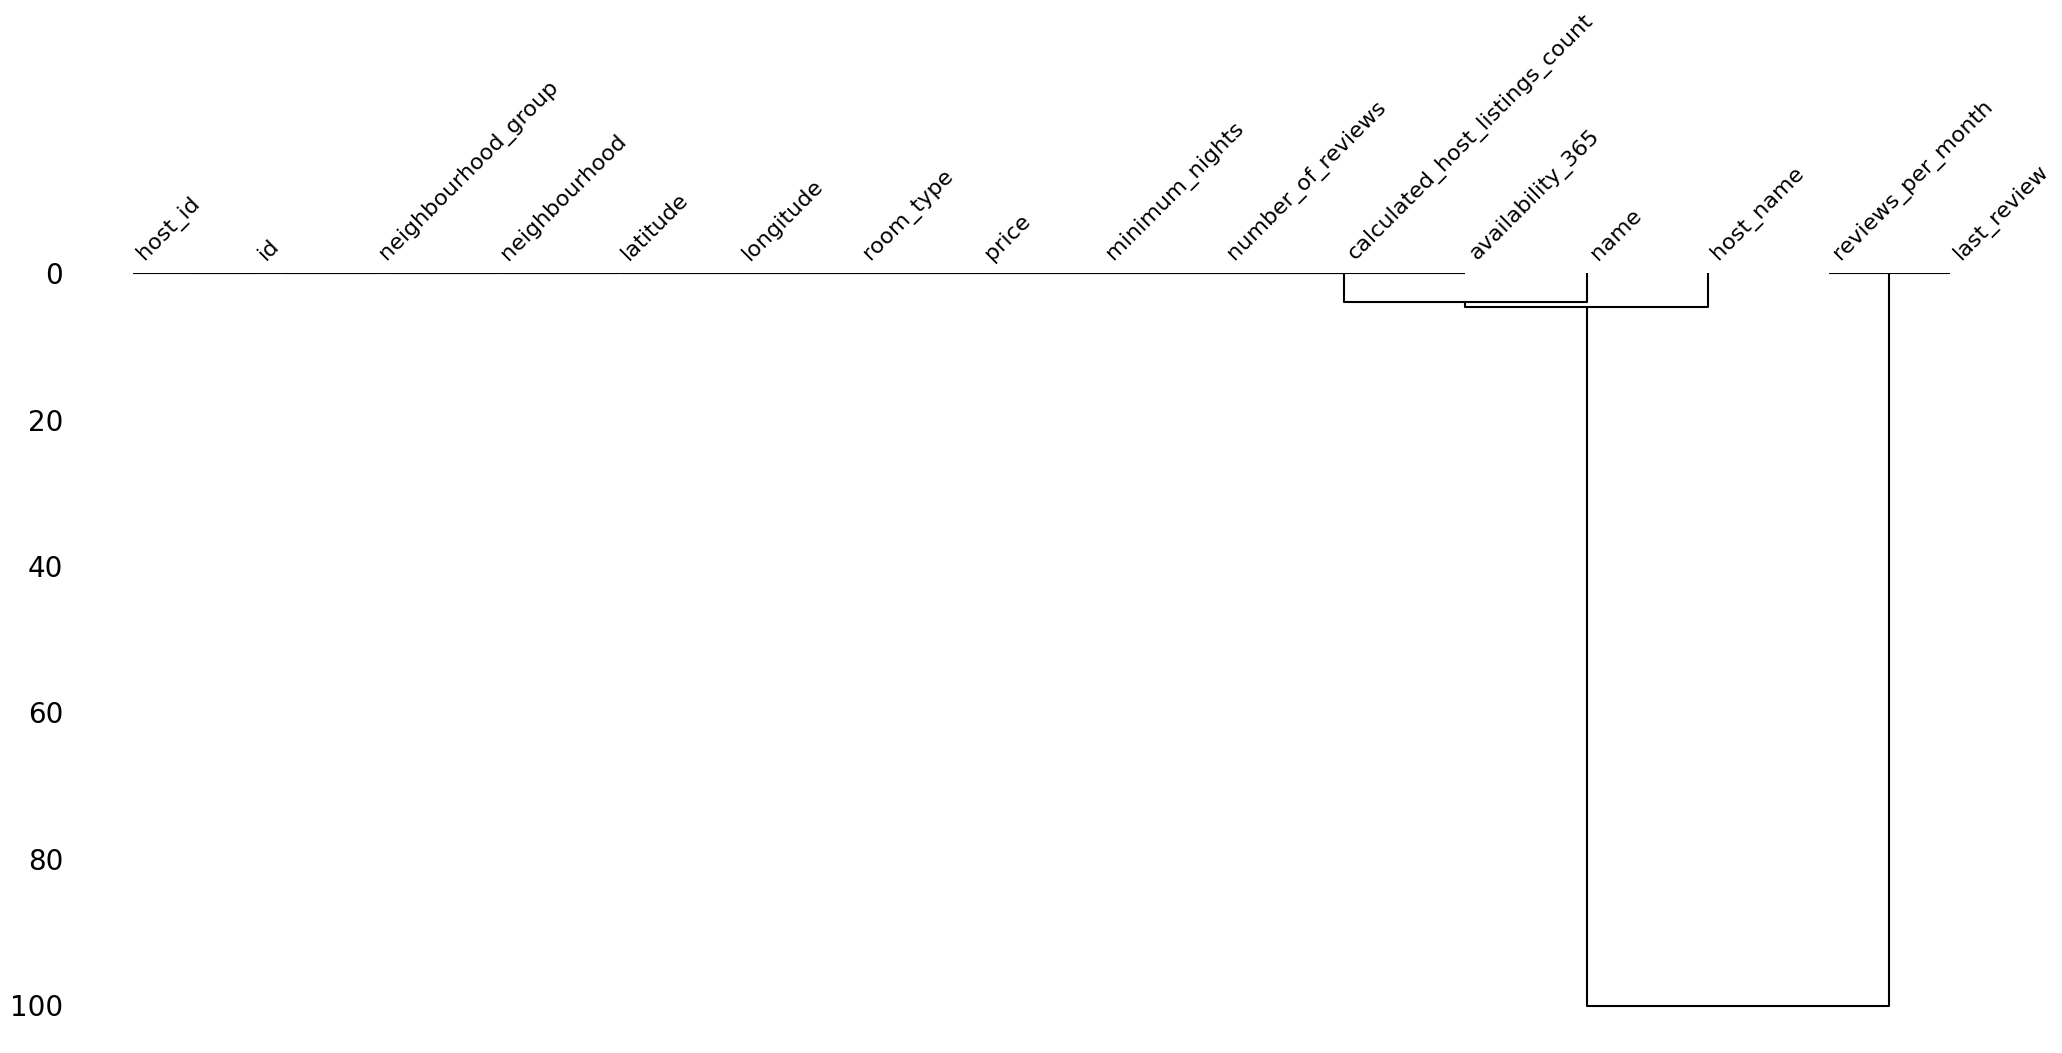

In [104]:
msno.dendrogram(df)

<Axes: title={'center': 'Log Normal'}, xlabel='price'>

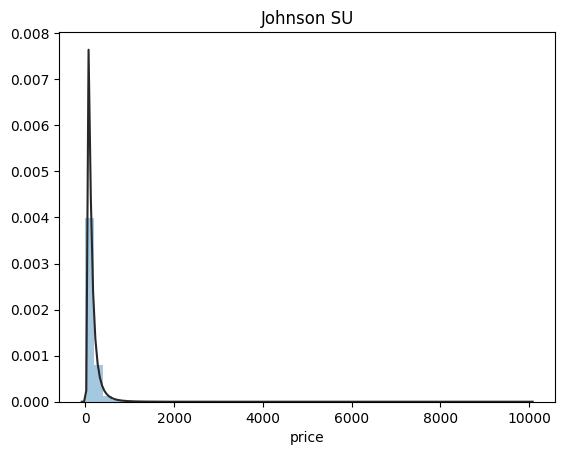

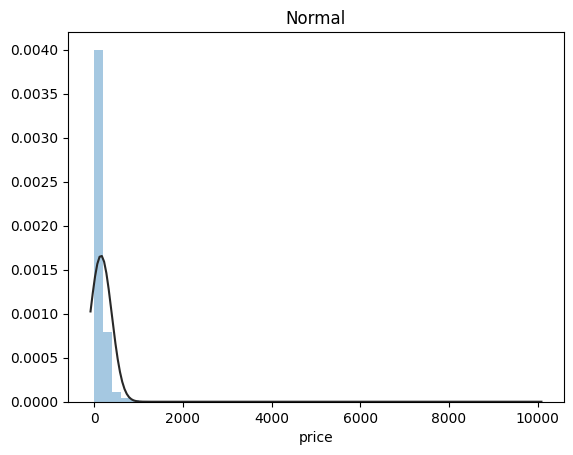

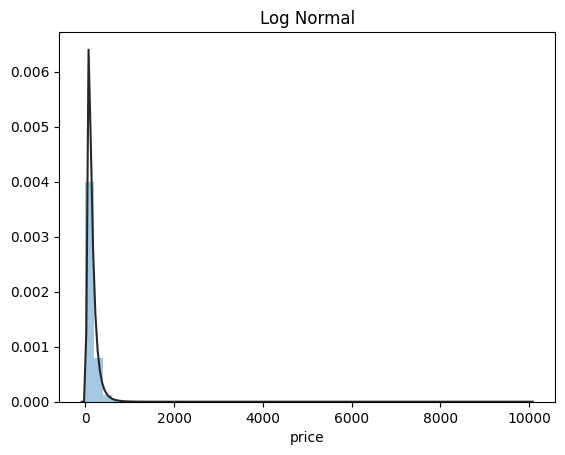

In [105]:
y = df['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

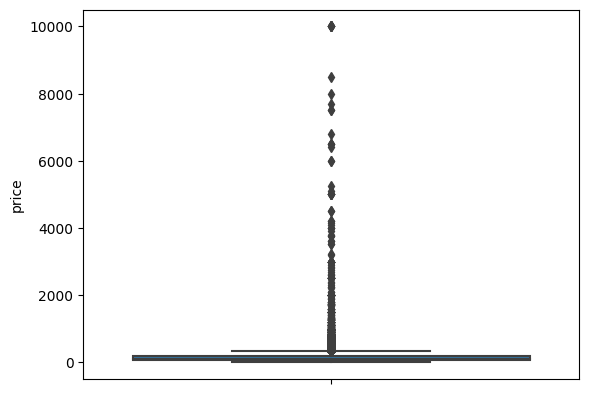

In [106]:
sns.boxplot(y=df['price'])
plt.show()

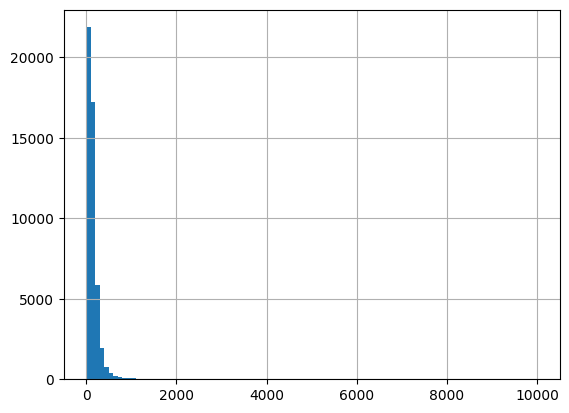

In [107]:
df['price'].hist(bins=100)
plt.show()

In [110]:
correlation = df.corr()['price'].sort_values(ascending=False)
correlation

price                             1.000000
availability_365                  0.081829
calculated_host_listings_count    0.057472
minimum_nights                    0.042799
latitude                          0.033939
host_id                           0.015309
id                                0.010619
reviews_per_month                -0.030608
number_of_reviews                -0.047954
longitude                        -0.150019
Name: price, dtype: float64

KeyboardInterrupt: 

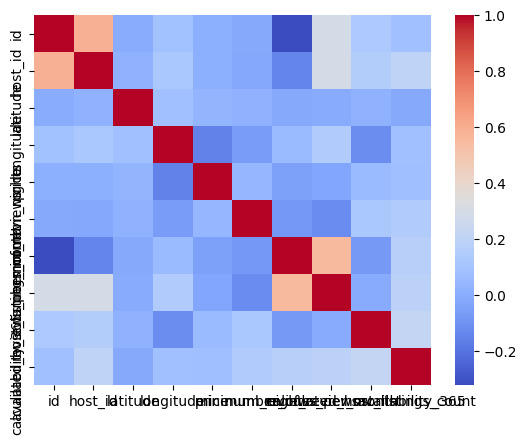

In [109]:
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

In [114]:
df.drop('last_review', axis=1, inplace=True)
df.drop('reviews_per_month', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)
df.drop('name', axis=1, inplace=True)
df.drop('host_id', axis=1, inplace=True)
df.drop('host_name', axis=1, inplace=True)

# Create a dictionary to store label encoders for each column
label_encoders = {}

# Create a copy of the original dataframe. This will help in reverting the label encoding
df_encoded = df.copy()

for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Separate features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Get the coefficient of each feature
coef_dict = {}
for coef, feat in zip(model.coef_,X.columns):
    coef_dict[feat] = coef

# To revert the label encoding
df_decoded = df_encoded.copy()
for col in df_decoded.columns:
    if df[col].dtype == 'object':
        df_decoded[col] = label_encoders[col].inverse_transform(df_decoded[col])


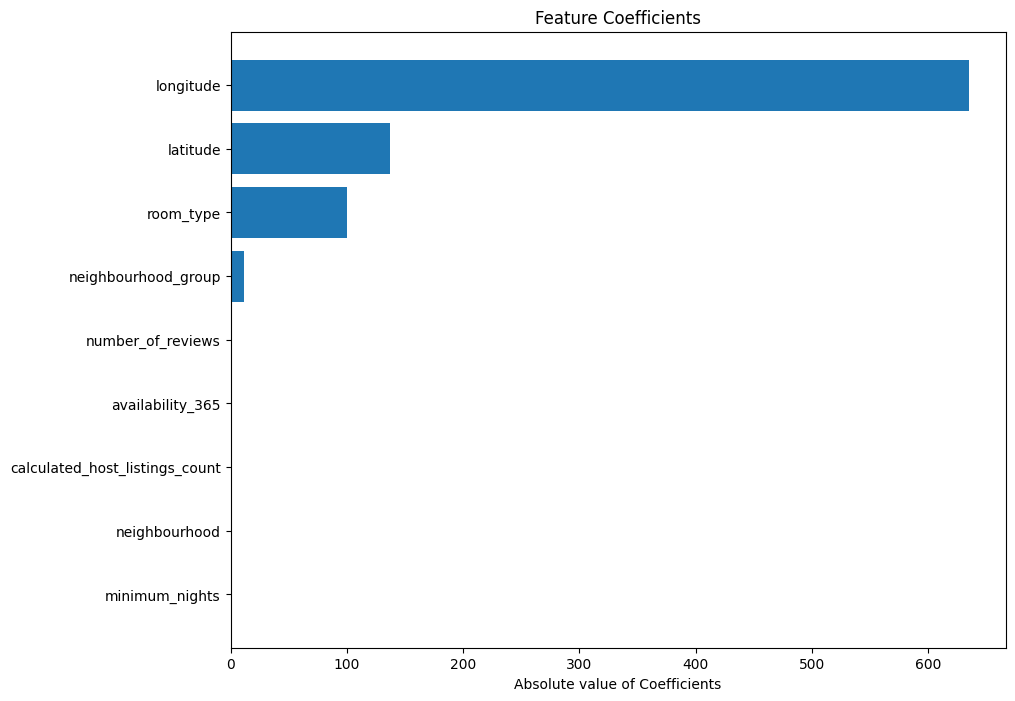

In [112]:
# Create a dictionary of absolute coefficients
abs_coef_dict = {k: abs(v) for k, v in coef_dict.items()}

# Sort this dictionary based on values
sorted_abs_coef_dict = dict(sorted(abs_coef_dict.items(), key=lambda item: item[1]))

# Visualizing absolute coefficients
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_abs_coef_dict)), list(sorted_abs_coef_dict.values()), align='center')
plt.yticks(range(len(sorted_abs_coef_dict)), list(sorted_abs_coef_dict.keys()))
plt.xlabel('Absolute value of Coefficients')
plt.title('Feature Coefficients')
plt.show()

In [ ]:
# Create a dictionary that maps feature names to their importance
feature_importance = dict(zip(X_train.columns, model.feature_importances_))

# Sort this dictionary based on values
sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1]))

# Visualizing feature importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_feature_importance)), list(sorted_feature_importance.values()), align='center')
plt.yticks(range(len(sorted_feature_importance)), list(sorted_feature_importance.keys()))
plt.xlabel('Feature Importance')
plt.title('Feature importance (Gradient Boosting Regressor)')
plt.show()

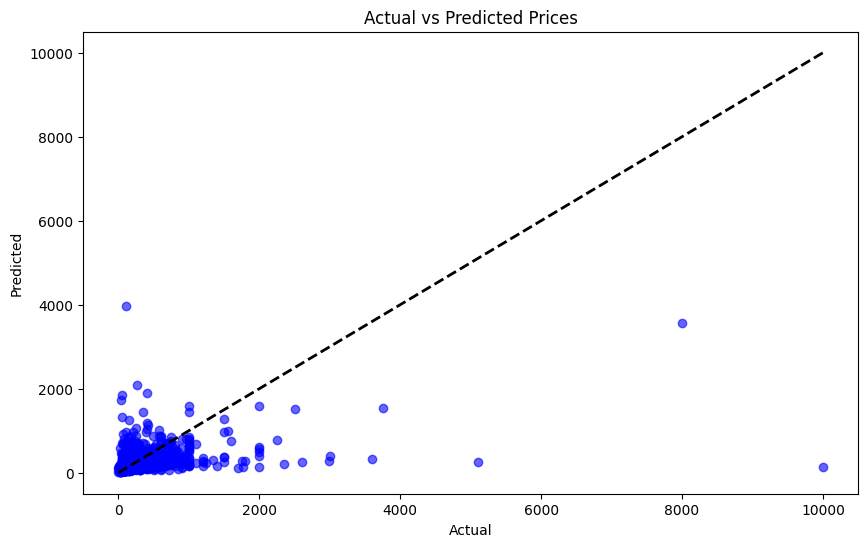

In [ ]:
# Create a scatter plot for the actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Prices')
plt.show()

In [115]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Create the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [1, 2, 3, 4],
    'subsample': [0.3, 0.5, 0.7, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

# As before, select features and target
features = df.drop('price', axis=1)
target = df['price']

# Handle categorical data
obj_features = features.select_dtypes(include='object').columns

# Label encoding
label_encoders = {}
for col in obj_features:
    le = LabelEncoder()
    features[col] = le.fit_transform(features[col])
    label_encoders[col] = le

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and fit the model
model = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
gbr_best = GradientBoostingRegressor(**best_params)
gbr_best.fit(X_train, y_train)
y_train_pred = gbr_best.predict(X_train)
y_test_pred = gbr_best.predict(X_test)

# Print the new R^2 scores
print("R2 Score: ", r2_score(y_train, y_train_pred))
# print("R2 Score - Test: ", r2_score(y_test, y_test_pred))

# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

# # Print model performance
# print('R2 score: ', r2_score(y_test, y_pred))
# print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))


Fitting 3 folds for each of 768 candidates, totalling 2304 fits
[CV] END learning_rate=0.01, max_depth=1, max_features=sqrt, n_estimators=100, subsample=0.3; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=1, max_features=sqrt, n_estimators=100, subsample=0.3; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=1, max_features=sqrt, n_estimators=100, subsample=0.3; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=1, max_features=sqrt, n_estimators=100, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=1, max_features=sqrt, n_estimators=100, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=1, max_features=sqrt, n_estimators=100, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=1, max_features=sqrt, n_estimators=100, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=1, max_features=sqrt, n_estimators=100, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.01, max

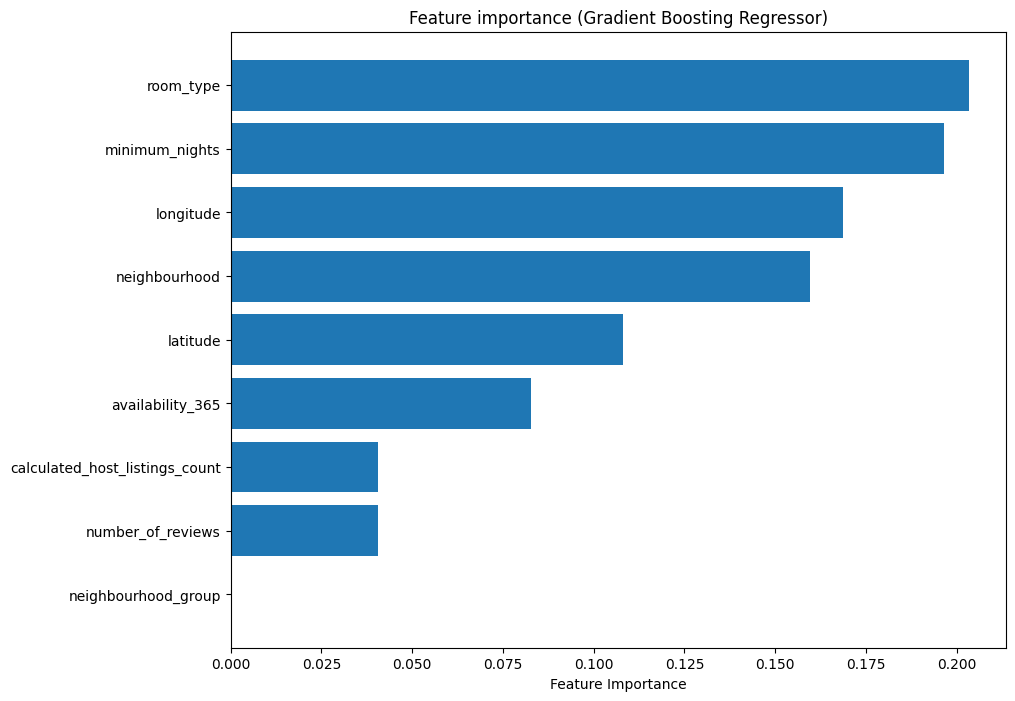

R2 score:  0.16039151788659844
Root Mean Squared Error:  192.7246735268888


In [118]:
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Create a dictionary that maps feature names to their importance
feature_importance = dict(zip(X_train.columns, model.feature_importances_))

# Sort this dictionary based on values
sorted_feature_importance = dict(sorted(feature_importance.items(), key=lambda item: item[1]))

# Visualizing feature importance
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_feature_importance)), list(sorted_feature_importance.values()), align='center')
plt.yticks(range(len(sorted_feature_importance)), list(sorted_feature_importance.keys()))
plt.xlabel('Feature Importance')
plt.title('Feature importance (Gradient Boosting Regressor)')
plt.show()

# Make predictions
y_pred = model.predict(X_test)

# Print model performance
print('R2 score: ', r2_score(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))
